In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
plt.style.use('ggplot')

In [3]:
songs = pd.read_csv('data/song data.csv')

In [4]:
songs

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [5]:
# songs.artists[0]

# res = songs.artists[0].strip('][').split(', ') 


# print(songs.artists[0])
# print(type(songs.artists[0]))
# print(res)
# print(type(res))
# # slist =[]
# # for x in songs.artists:
# #     slist.extend(x)
# # slist

In [6]:
songs_att = songs[['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','popularity']]

IndexError: single positional indexer is out-of-bounds

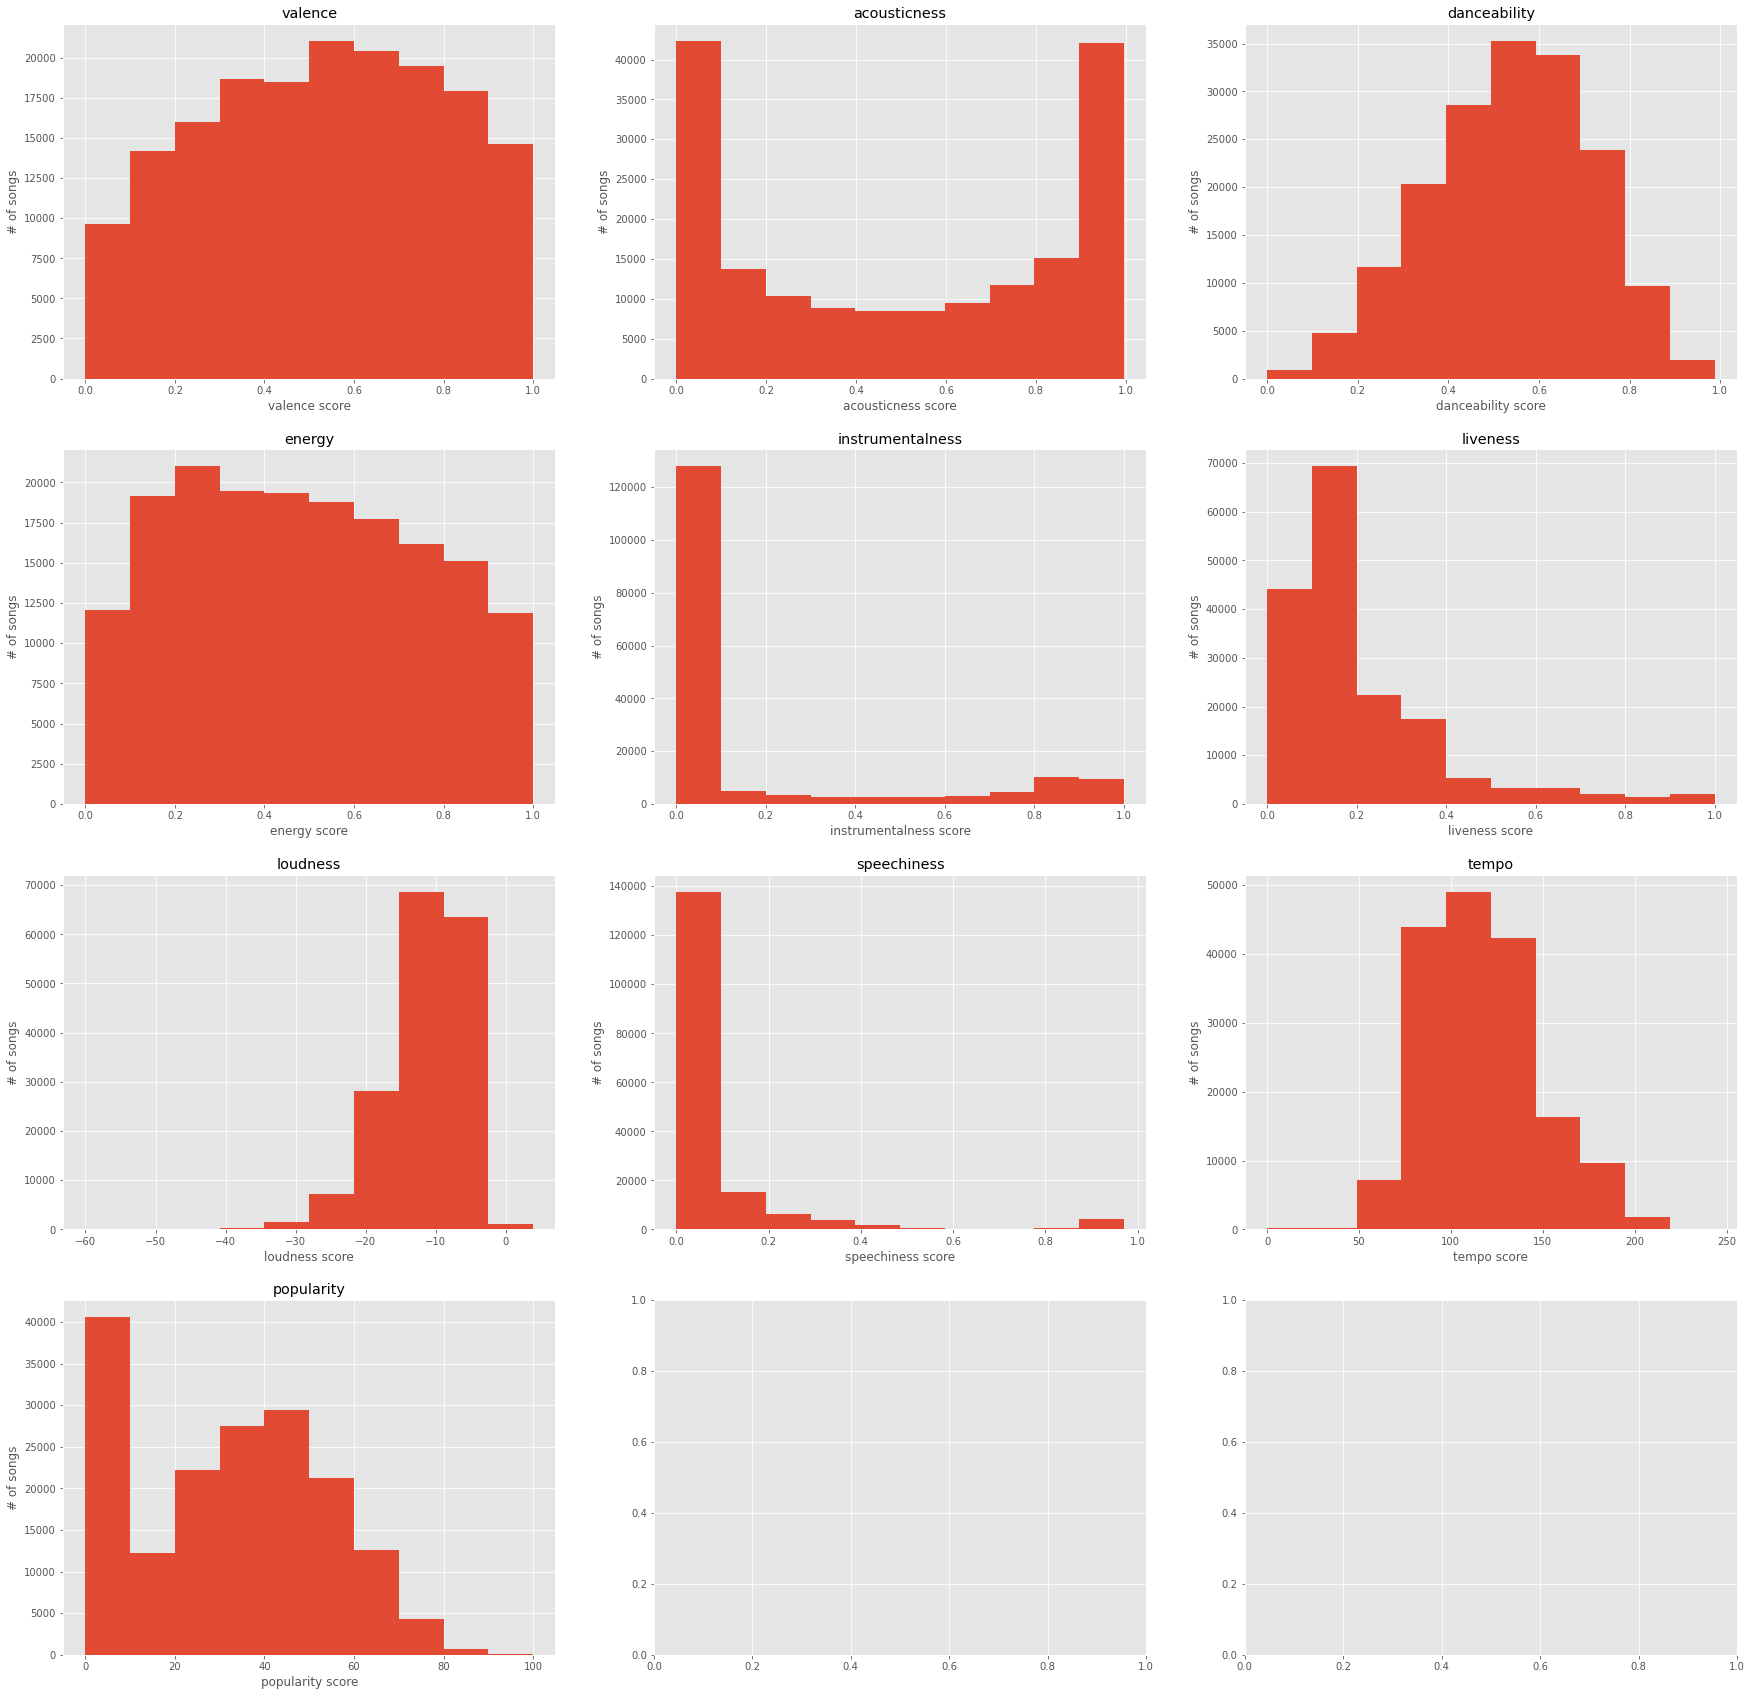

In [7]:
fig, ax = plt.subplots(4,3, figsize = (30,30))
plot_counter = 0

for row in ax:
    for col in row:
        col.hist(songs_att.iloc[:,plot_counter])
        col.set_title(songs_att.columns[plot_counter])
        col.set_xlabel(songs_att.columns[plot_counter] + ' score')
        col.set_ylabel('# of songs')
        plot_counter += 1

(array([ 7050.,  9625., 15378., 19700., 19699., 19950., 19900., 19857.,
        19706., 19788.]),
 array([1921. , 1930.9, 1940.8, 1950.7, 1960.6, 1970.5, 1980.4, 1990.3,
        2000.2, 2010.1, 2020. ]),
 <BarContainer object of 10 artists>)

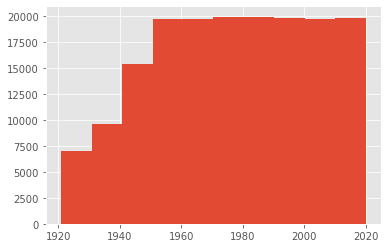

In [8]:
plt.hist(songs.year)

In [9]:
artist_dict = {}

for i in range(len(songs.artists)):
    for artist in songs.artists[i].strip('][').split(', '):
        if artist in artist_dict.keys():
            artist_dict[artist] += 1
        else:
            artist_dict[artist] = 1
        
sorted_artist_dict = {k: v for k, v in sorted(artist_dict.items(), key=lambda item: item[1], reverse = True)}

In [10]:
class ItemRecommender():
    '''
    Content based item recommender
    '''
    def __init__(self, similarity_measure=None):
        self.similarity_matrix = None
        self.item_names = None

        if similarity_measure == None:
            self.similarity_measure = cosine_similarity
        else:
            self.similarity_measure = similarity_measure

    
    def fit(self, X, titles=None):
        '''
        Takes a numpy array of the item attributes and creates the similarity matrix
        INPUT -
            X: NUMPY ARRAY - Rows are items, columns are feature values / or DF
            titles: LIST - List of the item names/titles in order of the numpy arrray
        
        OUTPUT - None
        Notes:  You might want to keep titles and X as attributes to refer to them later
        Create the a similarity matrix of item to item similarity
        '''

        # While keeping this as a sparse matrix would be best the cosign sim
        # function returns a array so there is no reason.
        
        if isinstance(X, pd.DataFrame):
            self.item_counts = X
#             X = X.drop(['name'], axis = 1)
            self.item_names = X.index
            self.similarity_df = pd.DataFrame(self.similarity_measure(X.values, X.values),
                 index = self.item_names)
        else:
            self.item_counts = X
            self.similarity_df = pd.DataFrame(self.similarity_measure(X, X),
                 index = titles)
            self.item_names = self.similarity_df.index

        
    def get_recommendations(self, item, n=5):
        '''
        Returns the top n items related to the item passed in
        INPUT:
            item    - STRING - Name of item in the original DataFrame 
            n       - INT    - Number of top related items to return 
        OUTPUT:
            items - List of the top n related item names
        For a given item find the n most similar items to it (this can be done using the similarity matrix created in the fit method)
        '''
        
#         song_index = self.item_counts.index[self.item_counts['name'] == item]
        return self.item_names[self.similarity_df.loc[item].values.argsort()[-(n+1):-1]].values[::1]

In [17]:
songs_features = songs[['name','artists','valence', 'acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'tempo','popularity']]
songs_features.drop_duplicates(subset = ['name'], inplace = True)
# samp_songs_features = songs_features.sample(30000, axis = 0, random_state = 999)
songs_features_pop = songs_features.sort_values(by = 'popularity', ascending = False)[:20000]

<ipython-input-17-c2cc550737ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_features.drop_duplicates(subset = ['name'], inplace = True)


In [21]:
songs_features_pop

,name,artists,valence,acousticness,danceability,energy,liveness,loudness,tempo,popularity
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']",0.1450,0.40100,0.731,0.5730,0.1130,-10.059,109.928,100
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",0.7560,0.22100,0.700,0.7220,0.2720,-3.558,90.989,99
19616,Blinding Lights,['The Weeknd'],0.3340,0.00146,0.514,0.7300,0.0897,-5.934,171.005,96
19612,What You Know Bout Love,['Pop Smoke'],0.5430,0.65000,0.709,0.5480,0.1330,-8.493,83.995,96
19610,positions,['Ariana Grande'],0.6820,0.46800,0.737,0.8020,0.0931,-4.771,144.015,96
...,...,...,...,...,...,...,...,...,...,...
52312,Real Hip-Hop,['Das EFX'],0.9510,0.02170,0.858,0.7600,0.3220,-7.895,93.082,56
90330,"Piano Concerto No.20 in D minor, K.466: 2. Rom...","['Wolfgang Amadeus Mozart', 'Mitsuko Uchida', ...",0.0983,0.98800,0.209,0.0314,0.1020,-26.249,81.629,56
33490,Coming Back to Life,['Pink Floyd'],0.1450,0.46400,0.286,0.4990,0.1020,-11.096,176.437,56
55700,Introduction to the Snow,['Miracle Musical'],0.1130,0.97900,0.339,0.2300,0.3530,-10.803,66.352,56


In [31]:
rec = ItemRecommender()
rec.fit(songs_features_pop.drop(['name','artists','popularity','liveness'], axis = 1))

In [34]:
def recommend_songs(index, n=5):
    input_song_df = pd.DataFrame(songs_features_pop.loc[index]).T
    input_song_df.index = ['INPUT']
    output_songs_df = songs_features_pop.loc[rec.get_recommendations(index, n=n)]
    output_songs_df.index = ['OUTPUT'] * n
    
    return input_song_df.append(output_songs_df).drop(['liveness', 'popularity'], axis = 1)

In [35]:
recommend_songs(19616, n=10)

,name,artists,valence,acousticness,danceability,energy,loudness,tempo
INPUT,Blinding Lights,['The Weeknd'],0.334,0.00146,0.514,0.73,-5.934,171.005
OUTPUT,Boulevard of Broken Dreams (feat. John Gallagh...,"['Green Day', 'John Gallagher Jr.', 'Rebecca N...",0.339,0.0569,0.417,0.647,-5.87,166.12
OUTPUT,Bury Me Face Down,['grandson'],0.162,0.0187,0.39,0.629,-4.876,141.983
OUTPUT,Overthinker,['INZO'],0.212,0.0311,0.472,0.605,-4.437,128.375
OUTPUT,Shorty Wanna Ride,['Young Buck'],0.331,0.00317,0.582,0.621,-6.183,179.458
OUTPUT,Danger Line,['Avenged Sevenfold'],0.375,0.00116,0.473,0.767,-6.383,180.024
OUTPUT,Nightmares (feat. Lil Skies),"['Yung Pinch', 'Lil Skies']",0.302,0.107,0.579,0.698,-5.701,165.071
OUTPUT,Lisztomania,['Phoenix'],0.315,0.0339,0.486,0.784,-6.68,195.154
OUTPUT,Horns,['Bryce Fox'],0.325,0.081,0.49,0.753,-5.41,156.241
OUTPUT,Thank God I Found You (feat. Joe & Nas) - Make...,"['Mariah Carey', 'Joe', 'Nas', 'Clue', 'Supa E...",0.366,0.0129,0.608,0.76,-5.851,168.211


In [36]:
recommend_songs(19606, n= 10)

,name,artists,valence,acousticness,danceability,energy,loudness,tempo
INPUT,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",0.756,0.221,0.7,0.722,-3.558,90.989
OUTPUT,Dame Algo,"['Wisin & Yandel', 'Bad Bunny']",0.721,0.176,0.829,0.723,-3.743,92.956
OUTPUT,Beast Of Burden - Remastered,['The Rolling Stones'],0.885,0.39,0.783,0.878,-3.864,100.626
OUTPUT,Mi primer millon,['Bacilos'],0.909,0.201,0.745,0.924,-3.898,103.033
OUTPUT,Hit 'em Up,['2Pac'],0.809,0.238,0.843,0.804,-3.839,95.155
OUTPUT,Lush Life,['Zara Larsson'],0.799,0.133,0.694,0.712,-3.923,98.022
OUTPUT,Sin Pijama,"['Becky G', 'Natti Natasha']",0.82,0.354,0.791,0.745,-3.695,94.014
OUTPUT,Pideme,['Grupo Legitimo'],0.888,0.283,0.823,0.728,-4.254,107.652
OUTPUT,"Mood (Remix) feat. Justin Bieber, J Balvin & i...","['24kGoldn', 'Justin Bieber', 'J Balvin', 'ian...",0.699,0.151,0.721,0.745,-3.508,90.988
OUTPUT,La Zona,['Bad Bunny'],0.81,0.2,0.762,0.801,-3.661,93.992


In [37]:
recommend_songs(17415, n= 10)

,name,artists,valence,acousticness,danceability,energy,loudness,tempo
INPUT,Bad Romance,['Lady Gaga'],0.714,0.00314,0.696,0.921,-3.755,119.001
OUTPUT,Houdini,['Foster The People'],0.764,0.00762,0.632,0.908,-3.511,110.024
OUTPUT,Me and My Kind,['Cody Johnson'],0.674,0.0835,0.588,0.807,-3.426,110.014
OUTPUT,G.U.Y.,['Lady Gaga'],0.572,0.0141,0.616,0.919,-3.468,110.008
OUTPUT,"Hey Look Ma, I Made It",['Panic! At The Disco'],0.58,0.0137,0.577,0.833,-3.337,107.936
OUTPUT,Sour Candy (with BLACKPINK),"['Lady Gaga', 'BLACKPINK']",0.784,0.0604,0.752,0.87,-3.812,120.006
OUTPUT,No Money,['Galantis'],0.803,0.0282,0.671,0.916,-4.014,126.01
OUTPUT,Supermassive Black Hole,['Muse'],0.782,0.0492,0.668,0.921,-3.727,120
OUTPUT,A Quien Le Importa,['Thalia'],0.799,0.04,0.709,0.93,-4.13,130.991
OUTPUT,Hicktown,['Jason Aldean'],0.768,0.00913,0.697,0.877,-3.885,121.534
